# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yellowbrick

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans


In [3]:
# Seed the random nunmber generator to ensure K-Means randomisation works properly.
random.seed()

print(f"Seeding random number generator. Random number is: {random.random()}")

#np.set_printoptions(threshold=np.inf)

Seeding random number generator. Random number is: 0.1283614586698799


# Part 2: SCADI Dataset

## Question 5
* Download the attached heartdisease.csv file. 
* Read the file and separate the class and feature matrix.

In [4]:
#unpruned_df = unpruned_df.replace('?', np.nan)
#print(unpruned_df)
#full_df = unpruned_df[~unpruned_df.eq("?").any(1)]
# The ? in the missing values sets the column type to object. Change the column to numeric.
#numericFeatures = pd.Series(["ca", "thal"], copy = False)
#full_df[numericFeatures] = full_df[numericFeatures].apply(pd.to_numeric)

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/heartdisease.csv'
unpruned_df = pd.read_csv(url)

print("Shape of data upon read: {}".format(unpruned_df.shape))
# Drop the rows with missing values
unpruned_df = unpruned_df.apply (pd.to_numeric, errors='coerce')# Anything non-numeric is NaN
print(unpruned_df)
unpruned_df = unpruned_df.dropna()
full_df = unpruned_df.reset_index(drop=True)

# Display meta data about the dataframe.
print("Shape of data post row pruning: {}\n".format(full_df.shape))
print("Dataframe structure:\n{}".format(full_df.dtypes))

# Separate the features form the labels
X = full_df.drop(['num'], axis=1)
y = full_df['num']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Display information about the contents to aid quality inspection.
print("\n"+"*"*75)
print("Dataframe Content Summary\n"+"*"*75)
print("\nFeatures:\n"+"="*10+"\n{}".format(X))
print("\nClasses:\n"+"="*10+"\n{}".format(y))

Shape of data upon read: (303, 14)
     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
298   45    1                1       110   264    0        0      132      0   
299   68    1                4       144   193    1        0      141      0   
300   57    1                4       130   131    0        0      115      1   
301   57    0                2       130   236    0        2      174      0   
302   38    1                3       138   175    0        0      173      0   

    

## Question 6
* Determine the number of clusters from the dataset. Is this the same as the actual number of classes in the dataset?

INFO: The breakdown of labels in the dataset are:
0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


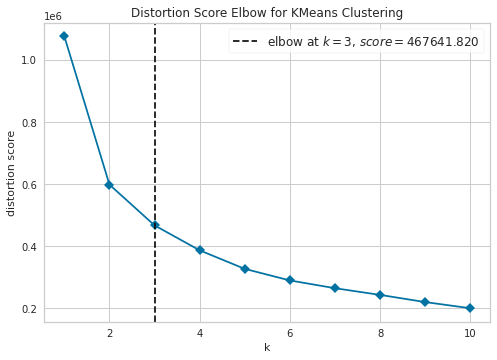

Cluster/Label relationship:
The number of unique labels in the dataset is: 5
Optimal number of clusters is: 3


In [6]:
# Scan through the labels and count the number of unique values.
num_labels = y.nunique()
print("INFO: The breakdown of labels in the dataset are:\n{}".format(y.value_counts()))

# Find the optimal number of clusters for the dataset
model = KMeans()
elbowChart = KElbowVisualizer(model, k=(1, 11), timings=False)

elbowChart.fit(X) # Fit the data to the visualiser
elbowChart.show() # Plot the graph and the elbow
plt.show()
optimalClusters = elbowChart.elbow_value_

print("Cluster/Label relationship:")
print(f"The number of unique labels in the dataset is: {num_labels}")
print(f"Optimal number of clusters is: {optimalClusters}")

# Question 7:

Perform K-Means clustering on the complete dataset and report the purity score.

In [12]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("INFO: Calculating clustering purity.")
    #print("INFO: Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"INFO: Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("INFO: Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity

In [23]:
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

#X.reset_index(drop=True)
# call fit method with data 
km_result = model.fit(X)

# coordinates of cluster center
centroids = model.cluster_centers_ 

In [24]:
# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 67.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 65.
INFO: Maximum frequency in cluster 2 is label 0. It has a count of 28.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5387%


## Discussion:
The data set is very imbalanced, there are
* 164 elements with label 0
* 55 with label 1
* 36 with label 2
* 35 with label 3
* 13 with label 4

As a result, it is not surprising that label 0 is overshadowing the purity of the clustering

# Question 8. 
There are several distance metrics for K-Means such as euclidean, squared euclidian, Manhattan, Chebyshev, Minowski.
  * Your job is to compare the purity score of k-means clustering for different distance metrics
  * Select the best distance metric and explain why this distance metric is best for the given dataset.

In [80]:
# Reference: 
#    The following code snippet is based on the work of Arush Chillar, 2021
#    Blog url: https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics/notebook

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# PyClustering uses an array and not a dataframe so need to convert the type.
numpy_X = X.to_numpy()

print(f"\nINFO: Number of clusters used for KMeans: {optimalClusters}")
print("INFO: Total number of data points in clusters is {}".format(numpy_X.shape[0]))

results_df = pd.DataFrame(columns=['purity', 'metric'])

for measure, value in distance_measures.items():
    print("*"*50)
    print(f"INFO: Calculating purity for {measure} distance\n")
    
    initial_centers = random_center_initializer(numpy_X, optimalClusters, random_state=10).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(numpy_X, initial_centers=initial_centers, metric=distance_metric(value))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    # pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, numpy_X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    # calculatePurity requires a 2D list so combin the two lists/Series into a single 2D daraframe
    d = pd.concat([y,pd.Series(pyLabels)], axis=1)
    d.columns = ['cluster', 'label']
    purity = calculatePurity(d)
    results_df = results_df.append({'purity':purity,'metric':measure}, ignore_index = True)
    
    print("INFO: The purity score for {} distance is {:.4f}%".format(measure, purity))
    print("*"*50+"\n")


INFO: Number of clusters used for KMeans: 3
INFO: Total number of data points in clusters is 297
**************************************************
INFO: Calculating purity for euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum frequency in cluster 2 is label 1. It has a count of 15.
INFO: Maximum frequency in cluster 3 is label 1. It has a count of 16.
INFO: Maximum frequency in cluster 4 is label 0. It has a count of 5.
INFO: The purity score for euclidean distance is 0.4613%
**************************************************

**************************************************
INFO: Calculating purity for squared euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum f

In [78]:
print("*"*50)
print("SUMMARY")
print("*"*50)
print(results_df)

max_purity_df = results_df[results_df.purity == results_df['purity'].max()]
max_purity_df = max_purity_df.reset_index()  # make sure indexes pair with number of rows
for index, row in max_purity_df.iterrows():
    print("The best distance metric(s) is: {} with {:.4}% purity.".format(row['metric'], row['purity']))

**************************************************
SUMMARY
**************************************************
     purity             metric
0  0.461279          euclidean
1  0.461279  squared euclidean
2  0.451178          manhattan
3  0.427609          chebyshev
4  0.767677           canberra
5  0.626263         chi-square
The best distance metric(s) is: canberra with 0.7677% purity.


# QUESTION: 9
Use selection criteria (ANOVA, Chi-squared) to select the best three features and use them for K-Means clustering.
Based on the purity score, which features are you going to recommend and why?